# Data deduplication with Python

As you’ve learned, the data cleaning and validating practices include several different steps, including handling missing data, outliers, and label encoding; checking for misspellings; and, handling duplicates. As a data professional, it will be your task to know how best to handle data values in those categories. In this reading, you'll learn more about handling duplicates. You will also learn to identify and decide whether deduplication is the right strategy for a dataset. In addition, you will learn some common Python functions for handling duplicates.

## Identifying duplicates 

Before we make any decisions on whether to remove duplicate values or not, we should first determine if duplicate values are present in our dataset. 

A simple way to identify duplicates is to use the duplicated() function from Pandas. duplicated() is a method of the DataFrame class.

This function returns a series of “true/false” outputs, with “true” indicating the data value is a duplicate, and “false” indicating it is a unique value. 

Here’s an example of a five-row dataframe: 

In [ ]:
df

RunReset

     brand    style  rating
0   Wowyow  cistern     4.0
1   Wowyow  cistern     4.0
2  Splaysh      jug     5.5
3  Splaysh    stock     3.3
4  Pipplee    stock     3.0

Using the duplicated() function, the result is that one has been marked “True,” indicating it is a duplicate.

In [ ]:
print(df)

print()

print(df.duplicated())

RunReset

     brand    style  rating
0   Wowyow  cistern     4.0
1   Wowyow  cistern     4.0
2  Splaysh      jug     5.5
3  Splaysh    stock     3.3
4  Pipplee    stock     3.0

0    False
1     True
2    False
3    False
4    False
dtype: bool

Identifying duplicates for an entire dataframe will be different than a single column or index. Be sure when you use the duplicated() function for an entire dataframe. The duplicated() function will only return _entire rows_ that have exactly matching values, not just individual matching values found within a column. If you wish to identify duplicates for only one column or a series of columns within a dataframe, you will need to include that in the “subset” portion of the argument field of the duplicated() function. Going further, if you’d like to specify which of the duplicates to keep as the “original” as opposed to the duplicate, you can specify that in the keep portion of the argument field.

Below is an example of identifying duplicates in only one column (subset) of values and labeling the last duplicates as “false,” so that they are “kept”: 

In [ ]:
print(df)

print()

print(df.duplicated(subset=['type'], keep='last'))

RunReset

    color  rating     type
0   olive     9.0    rinds
1   olive     9.0    rinds
2    gray     4.5  pellets
3  salmon    11.0  pellets
4  salmon     7.0  pellets

0     True
1    False
2     True
3     True
4    False
dtype: bool

## Decision time: To drop or not to drop?  

As you’ve learned, every dataset is unique and you cannot treat every dataset the same. When you are making the decision on whether to eliminate duplicate values or not, think deeply about the **dataset itself** and about **the objective you wish to achieve**. What impact will dropping duplicates have on your dataset and your objective? 

**1. Deciding to drop**

You should **drop or eliminate** duplicate values if duplicate values are clearly mistakes or will misrepresent the remaining unique values in the dataset.  

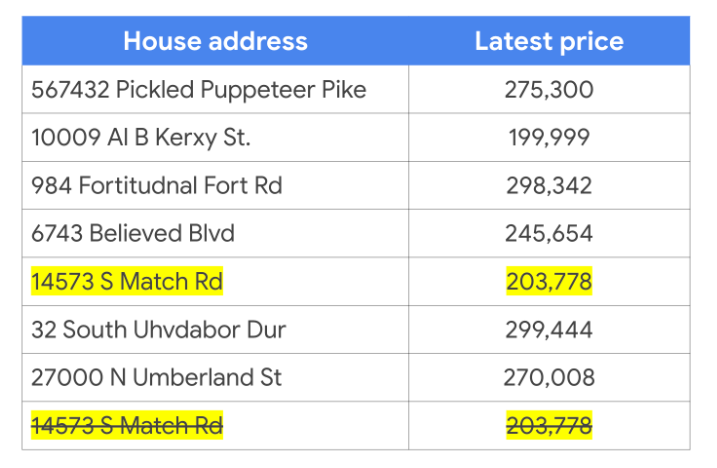

For example, you can be reasonably sure that a data professional will (in most cases) eliminate duplicate values of a dataset containing house addresses and house prices. Counting the same house twice will (in most cases) misrepresent any conclusions drawn from the dataset as a whole, such as average house price, total house price, or even total number of houses. In a case like this, a data professional would almost certainly eliminate the duplicate data so as to fairly represent the remaining data during analysis and visualization. 

**2. Deciding to NOT drop**

You should **keep** duplicated data in your dataset if the duplicate values are clearly **not** mistakes and should be taken into account when representing the dataset as a whole. 

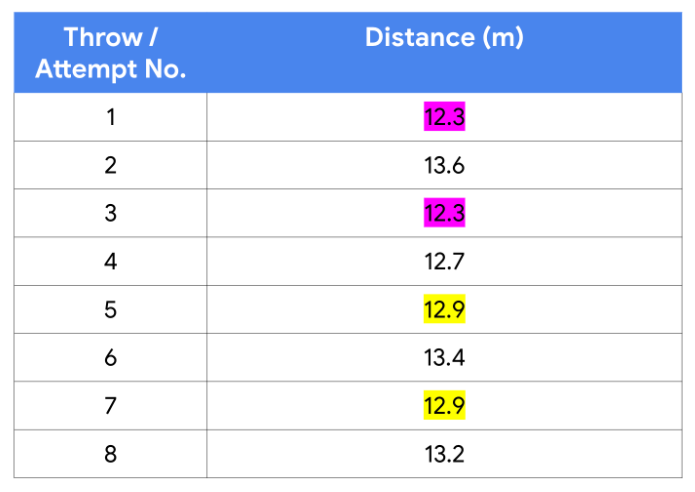

For example, a dataset marking the number of throws and distances of an Olympic shot-put athlete in training will likely include several duplicate distances; just by nature of number of attempts and the limits a person can have a weighted ball, there will be duplicate values—particularly if the distance measurements are labeled to only 1 or 2 decimal places. In a case like this, a data professional would almost certainly keep all of the data to fairly represent it as a whole during analysis and visualization.   

## Don’t be duped — How to do deduplication 

Before we get back into Python and learn how to eliminate duplicates, let’s first define the term “deduplication”: 

- **Deduplication:**  The elimination or removal of matching data values in a dataset.
    

There are a number of different libraries, functions, and methods in Python you could use to remove matching data values. 

One of the more common functions to use is in Pandas: drop_duplicates()

drop_duplicates() is another DataFrame method. It's used to create a new dataframe with all of the duplicate rows removed. 

For example, use a dataframe from earlier in this reading: 

In [ ]:
df

RunReset

     brand    style  rating
0   Wowyow  cistern     4.0
1   Wowyow  cistern     4.0
2  Splaysh      jug     5.5
3  Splaysh    stock     3.3
4  Pipplee    stock     3.0

Now apply the drop duplicates function:

In [ ]:
df.drop_duplicates()

RunReset

     brand    style  rating
0   Wowyow  cistern     4.0
2  Splaysh      jug     5.5
3  Splaysh    stock     3.3
4  Pipplee    stock     3.0

You’ll notice in the resulting output that the duplicate row of data was removed, leaving the remaining unique values intact. 

**Note:** Keep in mind that the drop_duplicates() function as written above will only drop duplicates of exact matches of **entire rows of data**. If you wish to drop duplicates within a single column, you will need to specify which columns to check for duplicates using the subset keyword argument.

This example drops all rows that have duplicate values in the style column (except for the first occurrence):

In [ ]:
print(df)

df = df.drop_duplicates(subset='style')

print()

print(df)

RunReset

     brand    style  rating
0   Wowyow  cistern     4.0
1   Wowyow  cistern     4.0
2  Splaysh      jug     5.5
3  Splaysh    stock     3.3
4  Pipplee    stock     3.0

     brand    style  rating
0   Wowyow  cistern     4.0
2  Splaysh      jug     5.5
3  Splaysh    stock     3.3

And this example drops all rows (except the first occurrence) that have _duplicate values in_ _both_ the style and rating columns:

In [ ]:
print(df)

df = df.drop_duplicates(subset=['style', 'rating'])

print()

print(df)

RunReset

     brand    style  rating
0   Wowyow  cistern     4.0
1   Wowyow  cistern     4.0
2  Splaysh      jug     5.5
3  Splaysh    stock     3.3
4  Pipplee    stock     3.0

     brand    style  rating
0   Wowyow  cistern     4.0
2  Splaysh      jug     5.5
3  Splaysh    stock     3.3
4  Pipplee    stock     3.0

## Key Takeaways

Identifying duplicate data values in a dataset is an important part of EDA (or “Exploratory Data Analysis”) practices, specifically cleaning and validating. After identifying duplicates, think about the impact to the dataset and your analysis objective when choosing to eliminate duplicates or not eliminate duplicates. 

## Additional Resources

Want to learn more about duplicates and deduplication? Check out the following additional links. 

- [Look at Pandas documentation to learn more about the parameters of the argument field](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
    
- [W3 Schools: Pandas - removing duplicates](https://www.w3schools.com/python/pandas/pandas_cleaning_duplicates.asp "W3 Schools - Pandas: Removing duplicates")